In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
theory50 = pd.read_excel('./power_unit/results/10-50,euler.xlsx')
theory50
con100 = pd.read_excel('./power_unit/results/connectivity-100units.xlsx')
con100

,edges,node_connectivity,edge_connectivity,centralized_lqr_mean,centralized_lqr_var,distributed_lqr_mean,distributed_lqr_var,lqr_iteration,dis_lqr_iteration,average total proj,...,average alternation proj,mean split,mean split2,mean_inter,mean_proj2,mean_sub,var_sub,max_sub,Theoretical,Theoretical-2
0,99,1,1,323.205694,0.414175,98.512249,0.049474,6.464048,1.970056,6.464000,...,1.969990,0.000904,0.001050,0.001522,0.392470,0.030155,0.001769,0.214383,0.217859,0.033630
1,249,2,2,320.550443,29.456976,311.019222,0.429169,6.410947,6.220015,6.410898,...,6.219938,0.000812,0.000959,0.002230,1.241753,0.161915,0.022259,0.787333,0.791334,0.165916
2,347,3,3,317.552751,28.212894,521.843870,155.804209,6.350993,10.436283,6.350943,...,10.436194,0.000796,0.000873,0.002683,2.084551,0.285123,0.044427,0.924932,0.929285,0.289475
3,381,4,4,320.834828,25.591009,616.679533,4.211641,6.416634,12.332983,6.416583,...,12.332884,0.000756,0.000816,0.002690,2.463882,0.336285,0.070502,1.172984,1.177245,0.340546
4,452,5,5,317.155775,2.486304,811.955752,0.941009,6.343047,16.238328,6.342995,...,16.238216,0.000799,0.000870,0.003178,3.244460,0.466828,0.102273,1.659397,1.664243,0.471674
5,579,6,6,317.507373,10.010821,1277.128214,500.314786,6.350079,25.541426,6.350028,...,25.541295,0.000822,0.000934,0.004009,5.104245,0.781690,0.208882,2.150503,2.156268,0.787455
6,698,7,7,318.658186,24.786821,1758.534235,26.465029,6.373099,35.169172,6.373050,...,35.169032,0.000799,0.000932,0.004772,7.029028,1.074931,0.280250,2.732249,2.738752,1.081433
7,834,8,8,321.232930,1.598764,2377.397121,175.089029,6.424599,47.545948,6.424552,...,47.545808,0.000696,0.000918,0.005137,9.504019,1.385116,0.359274,3.082468,3.089220,1.391867
8,848,9,9,314.546213,3.995559,2461.084720,12.064410,6.290860,49.219547,6.290811,...,49.219397,0.000679,0.000903,0.005231,9.838643,1.456365,0.447594,3.036117,3.042930,1.463178
9,852,10,10,320.792067,0.223324,2462.669140,290.999040,6.415778,49.251218,6.415728,...,49.251063,0.000720,0.000922,0.005449,9.844758,1.489925,0.439054,3.350971,3.358062,1.497016


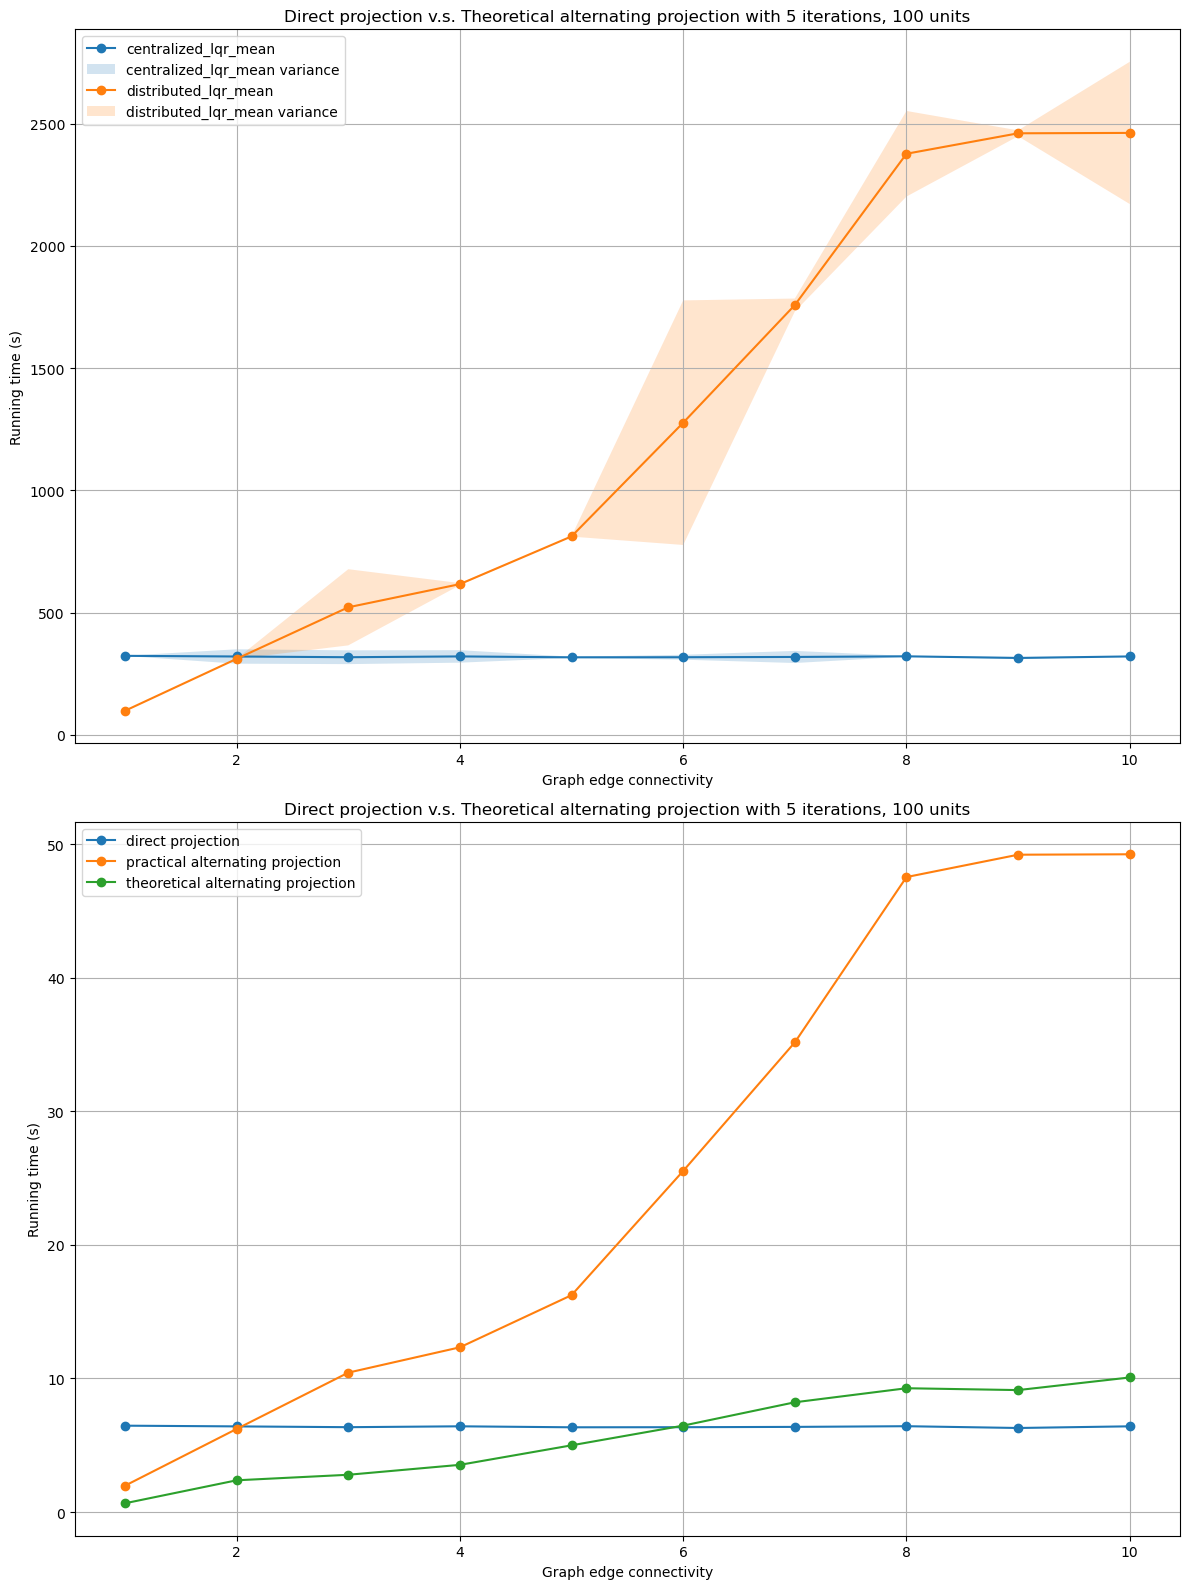

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

# First subplot for centralized_lqr_mean with variance
axs[0].plot(con100['edge_connectivity'], con100['centralized_lqr_mean'], label='centralized_lqr_mean', marker='o')
axs[0].fill_between(con100['edge_connectivity'], con100['centralized_lqr_mean'] - con100['centralized_lqr_var'], con100['centralized_lqr_mean'] + con100['centralized_lqr_var'], alpha=0.2,label='centralized_lqr_mean variance')

axs[0].plot(con100['edge_connectivity'], con100['distributed_lqr_mean'], label='distributed_lqr_mean', marker='o')
axs[0].fill_between(con100['edge_connectivity'], con100['distributed_lqr_mean'] - con100['distributed_lqr_var'], con100['distributed_lqr_mean'] + con100['distributed_lqr_var'], alpha=0.2,label='distributed_lqr_mean variance')

axs[0].set_title('Direct projection v.s. Theoretical alternating projection with 5 iterations, 100 units')
axs[0].set_xlabel('Graph edge connectivity')
axs[0].set_ylabel('Running time (s)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Second subplot for distributed_lqr_mean with variance
axs[1].plot(con100['edge_connectivity'], con100['average total proj'], label='direct projection', marker='o')
axs[1].plot(con100['edge_connectivity'], con100['average alternation proj'], label='practical alternating projection', marker='o')
axs[1].plot(con100['edge_connectivity'], 3*con100['Theoretical'], label='theoretical alternating projection', marker='o')
axs[1].set_title('Direct projection v.s. Theoretical alternating projection with 5 iterations, 100 units')
axs[1].set_xlabel('Graph edge connectivity')
axs[1].set_ylabel('Running time (s)')
axs[1].legend(loc='upper left')
axs[1].grid(True)
plt.tight_layout()

# Save the figure to a file
plt.savefig('connectivity.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

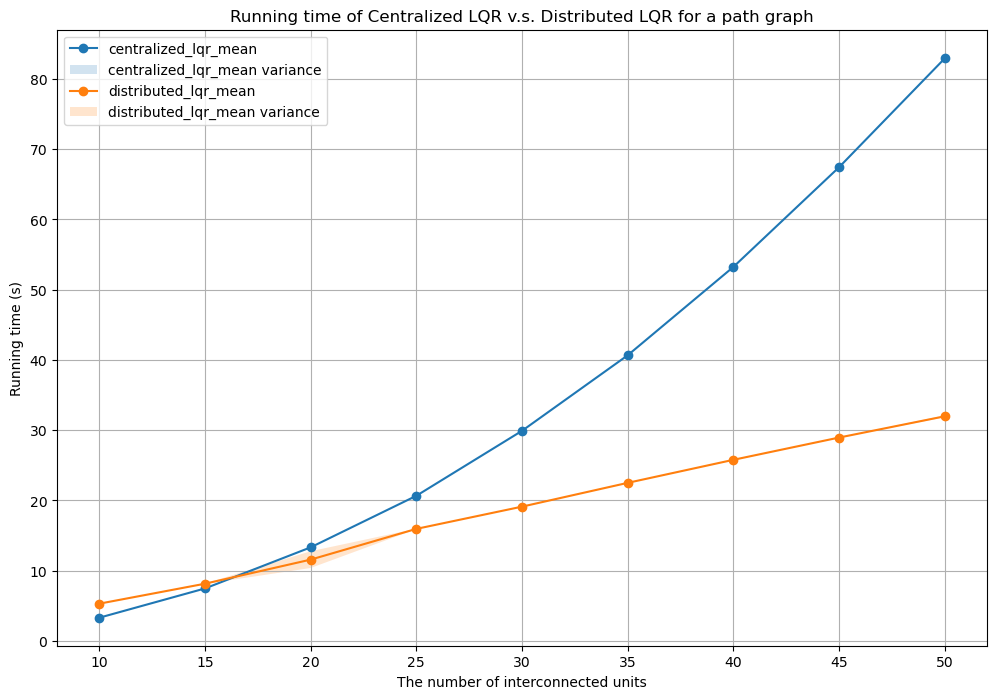

In [13]:
plt.figure(figsize=(12, 8))

# Plot centralized_lqr_mean
plt.plot(theory50['units'], theory50['centralized_lqr_mean'], label='centralized_lqr_mean', marker='o')
plt.fill_between(theory50['units'], theory50['centralized_lqr_mean'] - theory50['centralized_lqr_var'], theory50['centralized_lqr_mean'] + theory50['centralized_lqr_var'], alpha=0.2,label='centralized_lqr_mean variance')

plt.plot(theory50['units'], theory50['distributed_lqr_mean'], label='distributed_lqr_mean', marker='o')
plt.fill_between(theory50['units'], theory50['distributed_lqr_mean'] - theory50['distributed_lqr_var'], theory50['distributed_lqr_mean'] + theory50['distributed_lqr_var'], alpha=0.2,label='distributed_lqr_mean variance')

# Add title and labels
plt.title('Running time of Centralized LQR v.s. Distributed LQR for a path graph')
plt.xlabel('The number of interconnected units')
plt.ylabel('Running time (s)')
plt.legend()
plt.grid(True)
plt.savefig('LQR-running_time.png', dpi=300, bbox_inches='tight')
plt.show()

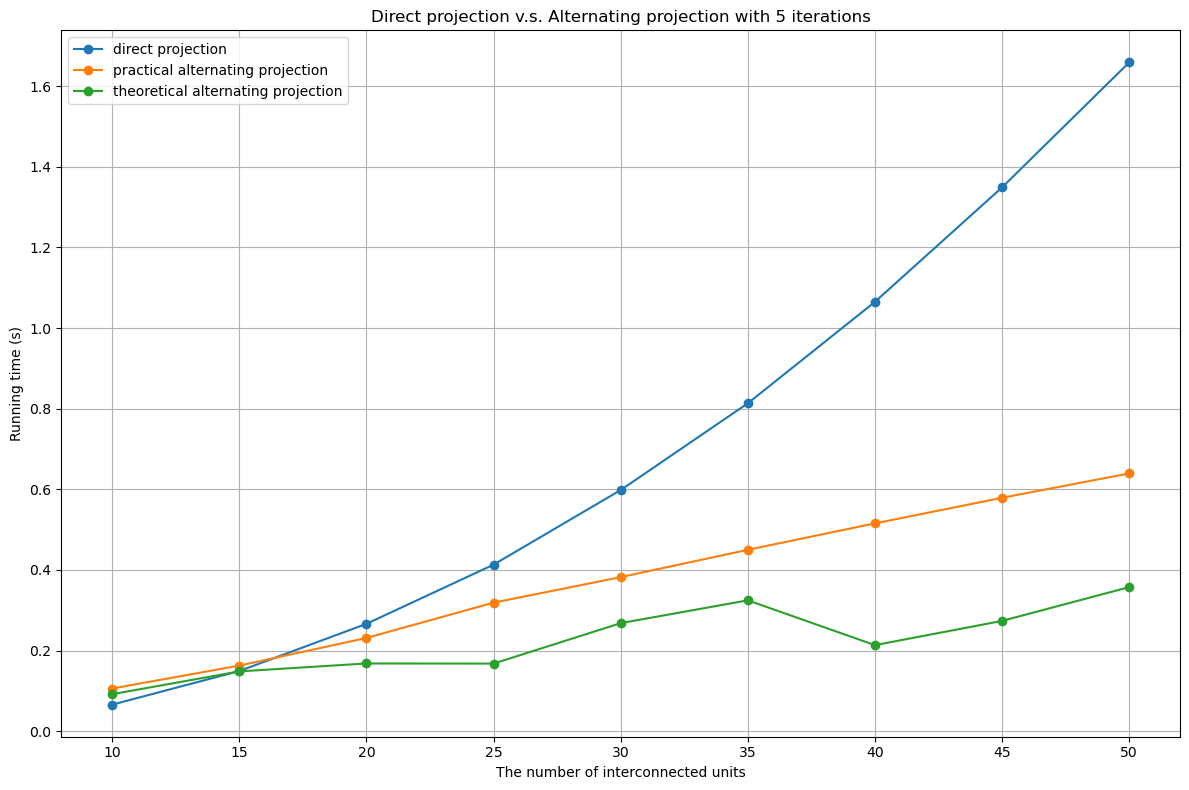

In [17]:
plt.figure(figsize=(12, 8))

# First subplot for centralized_lqr_mean with variance
plt.plot(theory50['units'], theory50['average total proj'], label='direct projection', marker='o')
plt.plot(theory50['units'], theory50['average alternation proj'], label='practical alternating projection', marker='o')
plt.plot(theory50['units'], 3*theory50['Theoretical'], label='theoretical alternating projection', marker='o')
plt.title('Direct projection v.s. Alternating projection with 5 iterations')
plt.xlabel('The number of interconnected units')
plt.ylabel('Running time (s)')
plt.legend()
plt.grid(True)

# Second subplot for distributed_lqr_mean with variance
# axs[1].plot(theory50['units'], theory50['average total proj'], label='distributed_lqr_mean', marker='o')
# axs[1].plot(theory50['units'], 3*theory50['Theoretical'], label='theoretical alternating projection', marker='o')
# axs[1].set_title('Direct projection v.s. Theoretical alternating projection with 5 iterations')
# axs[1].set_xlabel('The number of interconnected units')
# axs[1].set_ylabel('Running time (s)')
# axs[1].legend()
# axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Save the figure to a file
plt.savefig('projection time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()